In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import pickle
import nltk
import konlpy

In [2]:
with open('final.pkl', 'rb') as f:
    keyword = pickle.load(f)
    
with open('final_text_num.pkl', 'rb') as f:
    number_of_texts = pickle.load(f)

with open('final_whole_num.pkl', 'rb') as f:
    whole_number = pickle.load(f)

In [3]:
keyword

{'etc': [],
 '1970': ['막스베버', '카리스마', '정당성', '개념적', '재구성', '시도', '서울시내', '교사', '정치의식'],
 '1980': ['사회학이론',
  '현대사회',
  '사회운동',
  '사회변동',
  '제주',
  '농촌지역사회',
  '권력구조',
  'POWER',
  'STRUCTURE',
  'RURAL',
  'COMMUNITIES',
  'CHEJU',
  'ISLAND',
  '사회갈등',
  '지식인',
  '구조적',
  '관련성',
  '에밀',
  '뒤르껭',
  '사회적',
  '사실',
  '방법론적',
  '재해석',
  '소상품',
  '생산',
  '자본제',
  '1960년대',
  '이후',
  '서울시',
  '도시재개발',
  '정치경제학',
  '도시공간',
  '여말선초',
  '혁명',
  '종교',
  '유불',
  '재배권',
  '사회주의',
  '인구문제',
  '논쟁',
  '중공',
  '인구정책',
  '노년세대',
  '핵가족화',
  '경제개발계획',
  '국가정책'],
 '1990': ['태국사회',
  '태국사회',
  '온정적 상하관계',
  '생활태도',
  '사회적 관계망',
  '성별 직무 분리',
  '성차별적 고용관행',
  '성별 관계',
  '가족관계',
  '비공식적인 관계망',
  '새마을운동',
  '국가능력',
  '사회통제',
  '연계성(embeddeness)',
  '제도적 조건(institutional setting)',
  '연결망',
  '내적결속',
  '공동체적 통제기능',
  '새마을지도자',
  '민족주의',
  '분단체제',
  '냉전',
  '지배담론',
  '이데올로기',
  '탈식민화',
  '국가',
  '시민사회',
  '이항대립',
  '접합',
  '전통',
  '근대',
  '선택적 근대화',
  '수동혁명',
  '정치부패',
  '정치자금',
  '민주화',
  '선거',
  '정치권력',
  

In [4]:
with open("old_new.pkl", 'rb') as f:
    kw = pickle.load(f)

with open("count_old_new.pkl", 'rb') as f:
    nt = pickle.load(f)

In [7]:
for keys in number_of_texts.keys():
    print(f"{keys}: {number_of_texts[keys]}")

etc: 0
1970: 2
1980: 10
1990: 119
2000: 353
2010: 151
2020: 16


In [28]:
for keys in nt.keys():
    print(f"{keys}: {nt[keys]}")

recent: 108
old: 543


In [105]:
for keys in keyword.keys():
    print(f"{keys}: {len(keyword[keys])}")

etc: 0
1970: 0
1980: 0
1990: 130
2000: 2309
2010: 1735
2020: 166


In [5]:
text = {
    "etc": "",
    "1970": "",
    "1980": "",
    "1990": "",
    "2000": "",
    "2010": "",
    "2020": ""
}

In [6]:
kor = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

eng = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

In [7]:
kk = {
    "old":[],
    "recent":[]
}

ee = {
    "old":[],
    "recent":[]
}

# kor 은 영어 주제어, eng은 영어 주제어

In [9]:
for keys in keyword.keys():
    for s in keyword[keys]:
        for c in s:
            if ord('가') <= ord(c) <= ord('힣'):
                kor[keys].append(s)
                break
            elif ord('a') <= ord(c.lower()) <= ord('z'):
                eng[keys].append(s)
                break

In [10]:
for keys in kw.keys():
    for s in kw[keys]:
        for c in s:
            if ord('가') <= ord(c) <= ord('힣'):
                kk[keys].append(s)
                break
            elif ord('a') <= ord(c.lower()) <= ord('z'):
                ee[keys].append(s)
                break

In [11]:
# 연대별 데이터를 하나로 합치는 함수 
# no 파라미터에 전달되는 것은 합치지 않음 
def combining(keyword, no = []):
    whole = []
    for keys in keyword.keys():
        if keys in no:
            continue
        whole.append(keyword[keys])

    mydata = np.concatenate(whole).tolist()
    return mydata
def setencize(para):
    string = ' '.join(para)
    return string

In [12]:
# 각 연댑별 주제어들을 하나의 string으로 합친 뒤에 
# komoran POS Tagging으로 다시 나누기
# 각 연대별 

sent = {}
for keys in kor.keys():
    sent[keys] = setencize(kor[keys])

kmr = konlpy.tag.Komoran()
kmr_morphs = {}
for keys in kor.keys():
    kmr_morphs[keys] = kmr.pos(sent[keys])

In [13]:
kmr_morphs

{'etc': [],
 '1970': [('막스', 'NNP'),
  ('베버', 'NNP'),
  ('카리스마', 'NNP'),
  ('정당', 'NNG'),
  ('성', 'XSN'),
  ('개념', 'NNG'),
  ('적', 'XSN'),
  ('재구성', 'NNG'),
  ('시도', 'NNG'),
  ('서울시', 'NNP'),
  ('내', 'NNB'),
  ('교사', 'NNG'),
  ('정치의식', 'NNG'),
  ('막스', 'NNP'),
  ('베버', 'NNP'),
  ('카리스마', 'NNP'),
  ('정당', 'NNG'),
  ('성', 'XSN'),
  ('개념', 'NNG'),
  ('적', 'XSN'),
  ('재구성', 'NNG'),
  ('시도', 'NNG'),
  ('서울시', 'NNP'),
  ('내', 'NNB'),
  ('교사', 'NNG'),
  ('정치의식', 'NNG')],
 '1980': [('사회학', 'NNP'),
  ('이론', 'NNP'),
  ('현대', 'NNP'),
  ('사회', 'NNP'),
  ('사회', 'NNG'),
  ('운동', 'NNG'),
  ('사회', 'NNG'),
  ('변동', 'NNP'),
  ('제주', 'NNP'),
  ('농촌', 'NNG'),
  ('지역', 'NNG'),
  ('사회', 'NNG'),
  ('권력', 'NNP'),
  ('구조', 'NNP'),
  ('사회', 'NNG'),
  ('갈등', 'NNP'),
  ('지식인', 'NNP'),
  ('구조', 'NNG'),
  ('적', 'XSN'),
  ('관련성', 'NNP'),
  ('에밀', 'NNP'),
  ('뒤르껭', 'NA'),
  ('사회', 'NNG'),
  ('적', 'XSN'),
  ('사실', 'NNG'),
  ('방법론', 'NNP'),
  ('적', 'XSN'),
  ('재', 'XPN'),
  ('해석', 'NNP'),
  ('소', 'XPN'),
  ('상품', 'NNP'

In [14]:
# 불용어 제거 
# "사회" 단어 제거 
# 연대별로 나누어져 있는 dictonary를 파라미터로 넣음 
def ssremove(kor):
    stopwords = ["사회학", "사회", "사회적", "주의"]
    kor_whole = combining(kor)
    unique_Noun_words = set(kor_whole)
    for keys in kor.keys():
        for word in unique_Noun_words:
            if word in stopwords:
                while word in kor[keys]: kor[keys].remove(word)
    return kor

In [19]:
# komoran 품사 사전 이용해서 명사, 동사, 형용사, 부사 정도만 골라냄 
Featured_POS = ['NNG', 'NNP', 'NP', 'NR', "VV", "VA", "MM", "MAG",]
selected_words = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

for keys in kor.keys():
    for word, pos in kmr_morphs[keys]:
        if pos in Featured_POS:
            selected_words[keys].append(word)

# print(selected_words)

In [47]:
# 각 연댑별 주제어들을 하나의 string으로 합친 뒤에 
# komoran POS Tagging으로 다시 나누기
# old and recent
tt = {}
for keys in kk.keys():
    tt[keys] = setencize(kk[keys])

kmr = konlpy.tag.Komoran()
kmr_morphs_2 = {}
for keys in kk.keys():
    kmr_morphs_2[keys] = kmr.pos(tt[keys])

In [50]:
# komoran 품사 사전 이용해서 명사, 동사, 형용사, 부사 정도만 골라냄 
Featured_POS = ['NNG', 'NNP', 'NP', 'NR', "VV", "VA", "MM", "MAG",]
selected_words_2 = {
    "old":[],
    "recent":[]
}

for keys in kk.keys():
    for word, pos in kmr_morphs_2[keys]:
        if pos in Featured_POS:
            selected_words_2[keys].append(word)

# print(selected_words)

In [ ]:
# 전체 단어에 대해서 빈도 확인 
from collections import Counter
c = Counter(combining(selected_words)) # input type should be a list of words (or tokens)

In [17]:
# 불용어 제거한 기별 단어들 
selected_words = ssremove(selected_words)
selected_words


slct_old = combining(selected_words, ["2010", "2020"])
slct_new = combining(selected_words, ["etc", "1970", "1980", "1990", "2000"])


In [18]:
selected_words

{'etc': [],
 '1970': ['막스',
  '베버',
  '카리스마',
  '정당',
  '개념',
  '재구성',
  '시도',
  '서울시',
  '교사',
  '정치의식',
  '막스',
  '베버',
  '카리스마',
  '정당',
  '개념',
  '재구성',
  '시도',
  '서울시',
  '교사',
  '정치의식'],
 '1980': ['이론',
  '현대',
  '운동',
  '변동',
  '제주',
  '농촌',
  '지역',
  '권력',
  '구조',
  '갈등',
  '지식인',
  '구조',
  '관련성',
  '에밀',
  '사실',
  '방법론',
  '해석',
  '상품',
  '생산',
  '자본',
  '1960년대',
  '이후',
  '서울시',
  '도시',
  '개발',
  '정치경제학',
  '도시',
  '공간',
  '여말',
  '선초',
  '혁명',
  '종교',
  '유불',
  '재배',
  '사회주의',
  '인구',
  '문제',
  '논쟁',
  '중공',
  '인구',
  '정책',
  '노년',
  '세대',
  '핵가족',
  '경제',
  '개발',
  '계획',
  '국가',
  '정책',
  '이론',
  '현대',
  '운동',
  '변동',
  '제주',
  '농촌',
  '지역',
  '권력',
  '구조',
  '갈등',
  '지식인',
  '구조',
  '관련성',
  '에밀',
  '사실',
  '방법론',
  '해석',
  '상품',
  '생산',
  '자본',
  '1960년대',
  '이후',
  '서울시',
  '도시',
  '개발',
  '정치경제학',
  '도시',
  '공간',
  '여말',
  '선초',
  '혁명',
  '종교',
  '유불',
  '재배',
  '사회주의',
  '인구',
  '문제',
  '논쟁',
  '중공',
  '인구',
  '정책',
  '노년',
  '세대',
  '핵가족',
  '경제',
  '개발',
  '계획',
  '

In [74]:
# Counter 객체를 파라미터로 
# 빈도 n개 이상을 반환 
from collections import Counter
def selection(word_list, n):
    c = Counter(word_list)
    newly_selected = []
    for word, count in c.items():
        if count >= n:
            newly_selected.append(word)
    return newly_selected

In [75]:
old_5 = selection(slct_old, 5)
new_5 = selection(slct_new, 5)

In [51]:
# 불용어 제거한 기별 단어들 
selected_words_2 = ssremove(selected_words_2)
selected_words_2 

# 두 개의 딕셔너리로 구분되어 있음 

{'old': ['태국',
  '태국',
  '온정',
  '상하',
  '관계',
  '생활',
  '태도',
  '세계화',
  '유연',
  '시간',
  '노동자',
  '유연',
  '시간',
  '노동',
  '인생',
  '경로',
  '이행기',
  '재교육',
  '생활양식',
  '시간',
  '노동',
  '농지',
  '개혁',
  '역사',
  '제도',
  '제도',
  '행위자',
  '제도',
  '변화',
  '국가',
  '관계',
  '지주',
  '소작',
  '관계',
  '국가',
  '자율',
  '국가',
  '역량',
  '정치',
  '기회',
  '구조',
  '농민',
  '운동',
  '소작',
  '쟁의',
  '소작',
  '방매',
  '농업 정책',
  '사이버',
  '운동',
  '참여',
  '연대',
  '온라인',
  '자원',
  '전문',
  '운동',
  '조직',
  '네트',
  '행동주의',
  '단일',
  '현안',
  '운동',
  '대안',
  '문화',
  '공동체',
  '사이버',
  '공동체',
  '사이버',
  '공론',
  '장',
  '운동',
  '집중',
  '물질',
  '가치',
  '환경',
  '운동',
  '양심',
  '따르',
  '병역',
  '거부',
  '운동',
  '인권',
  '개념',
  '민주화',
  '경제',
  '위기',
  '가산',
  '군',
  '성',
  '차별',
  '여성',
  '운동',
  '공무원',
  '임용',
  '시험',
  '평등권',
  '인권',
  '페미니즘',
  '노동권',
  '범죄',
  '여성',
  '범죄',
  '여성',
  '피해자',
  '여성',
  '재소자',
  '법집행',
  '과정',
  '사회화',
  '올림픽 메달',
  '리스트',
  '사회화',
  '사회화',
  '기능주의',
  '포스트',
  '실증주의',
  '다차',
  '원성',
  '분석',
  '실

In [82]:
recent_5 = selection(selected_words_2["recent"], 5)
obsolete_5 = selection(selected_words_2["old"], 5)

In [20]:
len(slct_new) + len(slct_old) == len(combining(selected_words))

True

In [21]:
FONT_PATH = r'C:\Users\Autumn\AppData\Local\Microsoft\Windows\Fonts\GmarketSansTTFMedium.ttf' # For Korean characters
# yonsei = np.array(Image.open(r'basic.jpg'))
# colors = ImageColorGenerator(yonsei)

x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 480 ** 2
mask = 255 * mask.astype(int)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(200,219),np.random.randint(65,94),np.random.randint(31,40)))

wc = WordCloud(mask = mask, color_func=color_func, background_color="white", max_words=1000, max_font_size=1000, random_state=42, width=5000,height=5000, font_path=FONT_PATH)
#contour_color="#00498c", contour_width=1, color_func=colors)

# #f9d40a
#rgb(249, 212, 10)
#hsl(51, 95%, 51%)

# 검은색  #231815
#rgb(35, 24, 21)
#hsl(13, 25%, 11%)

# ㄹ얄 블루 
# hsl 219, 94, 34




In [23]:
number_of_texts

{'etc': 0,
 '1970': 2,
 '1980': 10,
 '1990': 119,
 '2000': 353,
 '2010': 151,
 '2020': 16}

In [22]:
print(len(slct_old))
# 2020, 2010년대는 제외  
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(slct_old)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('before_2010.png')


4534

In [24]:
len(slct_new)

1981

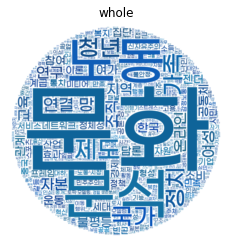

In [26]:
# 2020, 2010년대만
# 167개 논문, 1981개 키워드 

noun_text = ' '.join(slct_new)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('from_2010.png')


In [52]:
len(selected_words_2["old"])

5228

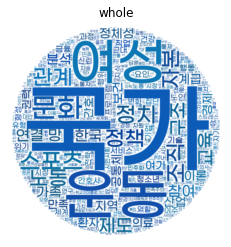

In [55]:
# 2012년까지 
# 543개 논문, 4534개 키워드 
noun_text = ' '.join(selected_words_2["old"])


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('till_2012.png')


In [53]:
len(selected_words_2["recent"])

1287

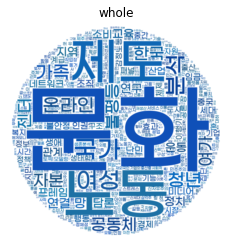

In [56]:
# 2020, 2010년대만
# 108개 논문, 1981개 키워드 

noun_text = ' '.join(selected_words_2["recent"])


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('from_2013.png')


229


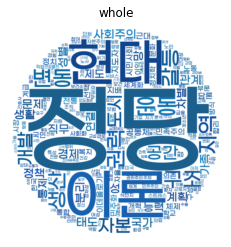

In [85]:
print(len(old_5))
# 2020, 2010년대는 제외  
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(old_5)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('before_2010_5.png')


79


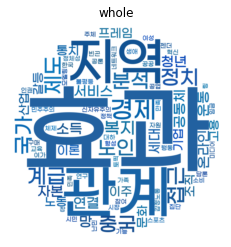

In [86]:
print(len(new_5))
# 2020년대 2010년대만   
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(new_5)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('after_2010_5.png')


256


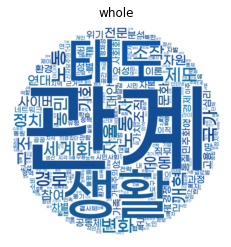

In [83]:
print(len(obsolete_5))
# 40주년까지 
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(obsolete_5)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('before_40th.png')


42


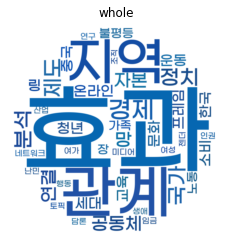

In [84]:
print(len(recent_5))
# 2020년대 2010년대만   
# 484개 논문, 4534개 키워드 
noun_text = ' '.join(recent_5)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('after_40th.png')


# 사용하지 않음 

In [14]:
temp = []
for keys in keyword.keys():
    if keys == "2020" or keys == "2010":
        continue
    temp.append(keyword[keys])

adjusted = np.concatenate(temp).tolist()


In [7]:
len(adjusted) == len(mydata) - len(keyword["2020"])

True

In [ ]:
length = 0
for keys in keyword.keys():
    # print(len(keyword[keys]))
    length = length + len(keyword[keys])


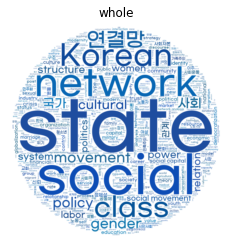

In [15]:
# 2020, 2010년대는 제외  

noun_text = ' '.join(adjusted)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_adjusted.png')


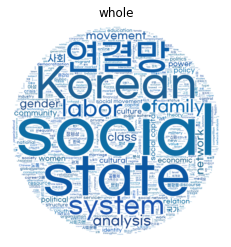

In [36]:
# 2020년대까지 포함 

noun_text = ' '.join(mydata)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc.recolor(color_func = color_func), interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_whole.png')


In [ ]:
len(adjusted) == len(mydata) - len(keyword["2020"])

True

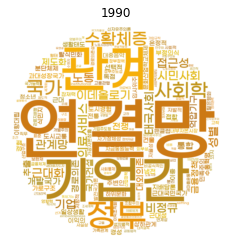

In [91]:
noun_text = ' '.join(keyword["1990"])


wc.generate(noun_text)
plt.title("1990")
plt.imshow(wc.recolor(color_func = color_func), interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_1990.png')


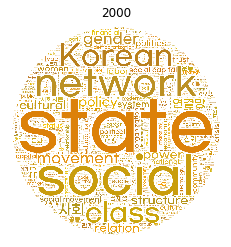

In [92]:
noun_text = ' '.join(keyword["2000"])


wc.generate(noun_text)
plt.title("2000")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2000.png')


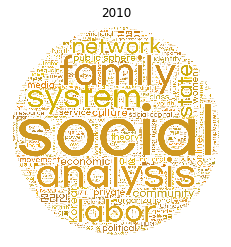

In [93]:
noun_text = ' '.join(keyword["2010"])


wc.generate(noun_text)
plt.title("2010")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2010.png')


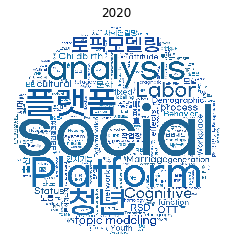

In [28]:
noun_text = ' '.join(keyword["2020"])


wc.generate(noun_text)
plt.title("2020")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2020.png')
